In [1]:
import os
import airfrans as af
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directory_name='Dataset'
if not os.path.isdir(directory_name):
    af.dataset.download(root = ".", file_name = directory_name, unzip = True, OpenFOAM = False)

In [3]:
dataset_list, dataset_name = af.dataset.load(root = directory_name, task = 'scarce', train = True)

Loading dataset (task: scarce, split: train): 100%|██████████| 200/200 [00:38<00:00,  5.16it/s]


In [4]:
first_simulation_name = dataset_name[0]
simulation = af.Simulation(root = directory_name, name = first_simulation_name, T = 298.15)
print((simulation.pressure))

[[ 2.8599031 ]
 [ 2.86004496]
 [ 3.25235939]
 ...
 [22.20865631]
 [21.9026947 ]
 [21.59410858]]


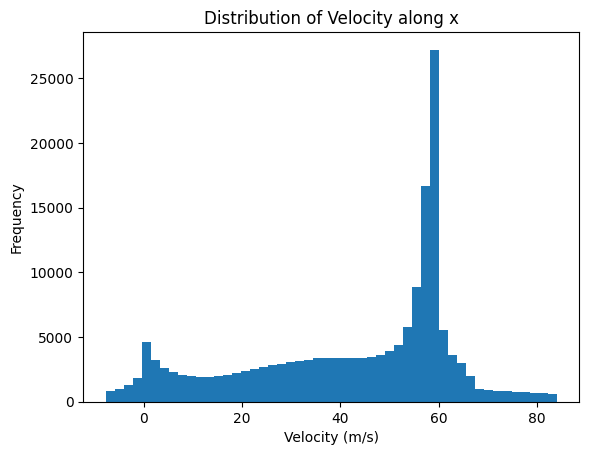

In [14]:
plt.hist(simulation.velocity[:, 0], bins=50)
plt.xlabel("Velocity (m/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Velocity along x")
plt.show()

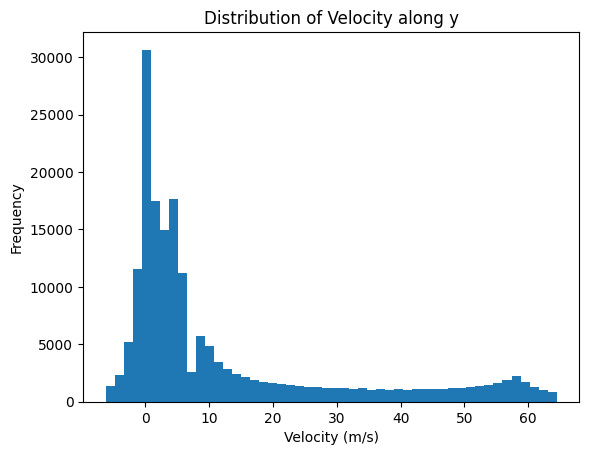

In [6]:
plt.hist(simulation.velocity[:, 1], bins=50)
plt.xlabel("Velocity (m/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Velocity along y")
plt.show()

In [13]:
all_x_velocity = []
all_y_velocity = []
all_velocity_magnitudes = []
average_velocities = []

all_pressures = []
all_nu_t = []

for simulation_name in dataset_name:
    try:
        simulation = af.Simulation(root=directory_name, name=simulation_name, T=298.15)
        all_x_velocity.extend(simulation.velocity[:, 0])
        all_y_velocity.extend(simulation.velocity[:, 1])

        velocity_magnitudes = np.linalg.norm(simulation.velocity, axis=1)
        all_velocity_magnitudes.extend(velocity_magnitudes)

        average_velocity = np.mean(velocity_magnitudes)
        average_velocities.append(average_velocity)

        all_pressures.extend(simulation.pressure)
        all_nu_t.extend(simulation.nu_t)

    except Exception as e:
        print(f"Error processing simulation {simulation_name}: {e}")

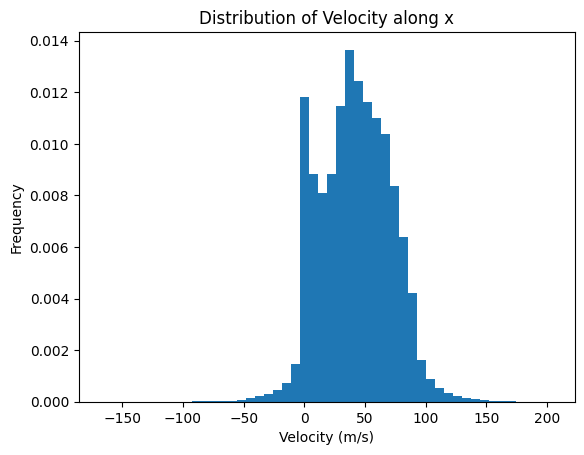

In [14]:
plt.hist(all_x_velocity, bins=50, density=True)
plt.xlabel("Velocity (m/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Velocity along x")
plt.show()

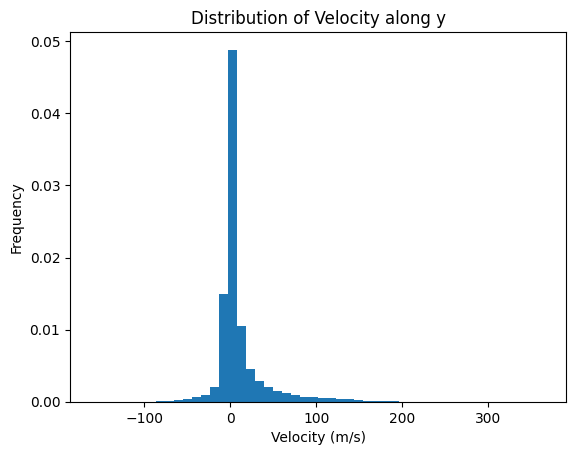

In [ ]:
plt.hist(all_y_velocity, bins=50, density=True)
plt.xlabel("Velocity (m/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Velocity along y")
plt.show()

In [12]:
mean_velocity = np.mean(all_velocity_magnitudes)
print(mean_velocity)

std_velocity = np.std(all_velocity_magnitudes)
print(std_velocity)

min_velocity = np.min(all_velocity_magnitudes)
print(min_velocity)

max_velocity = np.max(all_velocity_magnitudes)
print(max_velocity)

50.577733743979614
32.029008461458915
0.0
364.9069234724647


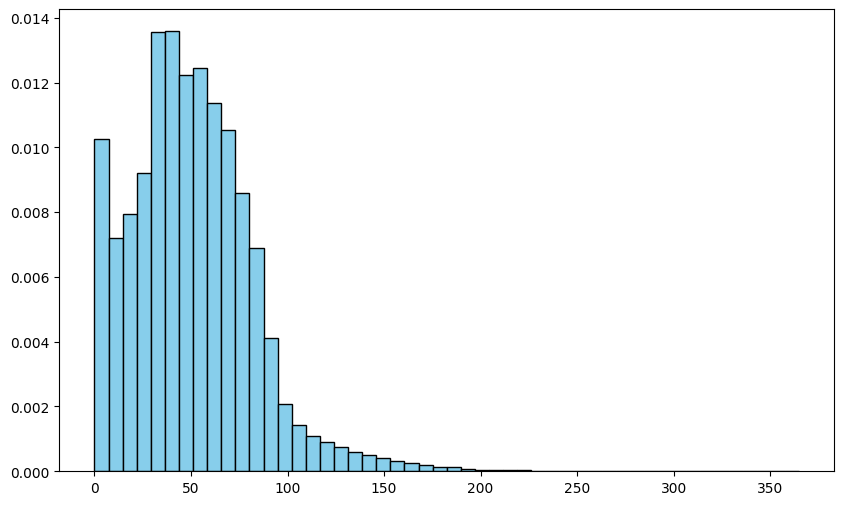

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(all_velocity_magnitudes, density=True, bins=50, color='skyblue', edgecolor='black')
plt.show()

In [22]:
mean_pressure = np.mean(all_pressures)
print(mean_pressure)

std_pressure = np.std(all_pressures)
print(std_pressure)

min_pressure = np.min(all_pressures)
print(min_pressure)

max_pressure = np.max(all_pressures)
print(max_pressure)

-410.197780446273
2518.021888948864
-64466.19921875
4320.615234375


In [6]:
mean_nu_t = np.mean(all_nu_t)
print(mean_nu_t)

std_nu_t = np.std(all_nu_t)
print(std_nu_t)

min_nu_t = np.min(all_nu_t)
print(min_nu_t)

max_nu_t = np.max(all_nu_t)
print(max_nu_t)

0.0008174156973501786
0.0029589239670348108
0.0
0.07679157704114914


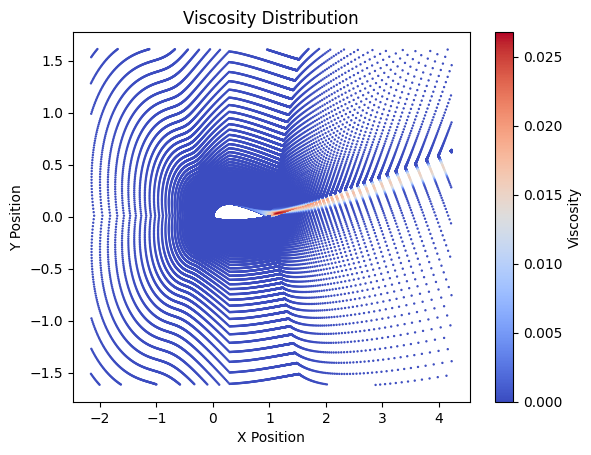

In [6]:
plt.scatter(simulation.position[:, 0], simulation.position[:, 1], c=simulation.nu_t, cmap='coolwarm', s=0.5)
plt.colorbar(label='Viscosity')
plt.title('Viscosity Distribution')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()
